In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scratch.linear_algebra import Vector,distance
import random
from collections import Counter
from typing import NamedTuple  

In [2]:
# =================================
# Import DataSet
# =================================
df=pd.read_csv("Weather Dataset.csv")
print ('Data Set:')
print (f"Columns\t:{df.shape[1]} \nRows\t:{df.shape[0]}")
df.head()

Data Set:
Columns	:8 
Rows	:8784


Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0  1/1/2012 0:00    -1.8              -3.9         86                4   
1  1/1/2012 1:00    -1.8              -3.7         87                4   
2  1/1/2012 2:00    -1.8              -3.4         89                7   
3  1/1/2012 3:00    -1.5              -3.2         88                6   
4  1/1/2012 4:00    -1.5              -3.3         88                7   

   Visibility_km  Press_kPa               Weather  
0            8.0     101.24                   Fog  
1            8.0     101.24                   Fog  
2            4.0     101.26  Freezing Drizzle,Fog  
3            4.0     101.27  Freezing Drizzle,Fog  
4            4.8     101.23                   Fog

In [3]:
# ==================================
# Title Columns
# ==================================
print (df.columns)
print ("fixed")
df.columns =df.columns.str.strip().str.lower().str.replace(' ',"_")
print (df.columns)

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')
fixed
Index(['date/time', 'temp_c', 'dew_point_temp_c', 'rel_hum_%',
       'wind_speed_km/h', 'visibility_km', 'press_kpa', 'weather'],
      dtype='object')


In [4]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date/time         8784 non-null   object 
 1   temp_c            8784 non-null   float64
 2   dew_point_temp_c  8784 non-null   float64
 3   rel_hum_%         8784 non-null   int64  
 4   wind_speed_km/h   8784 non-null   int64  
 5   visibility_km     8784 non-null   float64
 6   press_kpa         8784 non-null   float64
 7   weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [5]:
df.isnull().sum()

date/time           0
temp_c              0
dew_point_temp_c    0
rel_hum_%           0
wind_speed_km/h     0
visibility_km       0
press_kpa           0
weather             0
dtype: int64

In [6]:
# ===========================
# exract date/time column
# ============================
df["date/time"].head()
df["time"]=df["date/time"].str.split(" ").str[1]
df["date"]=pd.to_datetime(df["date/time"].str.split (" ").str[0])
df ['months']=df['date'].dt.month
df['year']=df['date'].dt.year
df.head()

date/time  temp_c  dew_point_temp_c  rel_hum_%  wind_speed_km/h  \
0  1/1/2012 0:00    -1.8              -3.9         86                4   
1  1/1/2012 1:00    -1.8              -3.7         87                4   
2  1/1/2012 2:00    -1.8              -3.4         89                7   
3  1/1/2012 3:00    -1.5              -3.2         88                6   
4  1/1/2012 4:00    -1.5              -3.3         88                7   

   visibility_km  press_kpa               weather  time       date  months  \
0            8.0     101.24                   Fog  0:00 2012-01-01       1   
1            8.0     101.24                   Fog  1:00 2012-01-01       1   
2            4.0     101.26  Freezing Drizzle,Fog  2:00 2012-01-01       1   
3            4.0     101.27  Freezing Drizzle,Fog  3:00 2012-01-01       1   
4            4.8     101.23                   Fog  4:00 2012-01-01       1   

   year  
0  2012  
1  2012  
2  2012  
3  2012  
4  2012

In [7]:
# Change time type data time
df["time"].unique().tolist()
df["time"]=df['time'].str.split(":").str[0]
df["time"]=pd.to_numeric(df["time"])

In [8]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date/time         8784 non-null   object        
 1   temp_c            8784 non-null   float64       
 2   dew_point_temp_c  8784 non-null   float64       
 3   rel_hum_%         8784 non-null   int64         
 4   wind_speed_km/h   8784 non-null   int64         
 5   visibility_km     8784 non-null   float64       
 6   press_kpa         8784 non-null   float64       
 7   weather           8784 non-null   object        
 8   time              8784 non-null   int64         
 9   date              8784 non-null   datetime64[ns]
 10  months            8784 non-null   int32         
 11  year              8784 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(2), int64(3), object(2)
memory usage: 755.0+ KB


In [9]:
# deleta column
df.drop(['date/time','date'],axis =1,inplace=True)

In [10]:
df.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['temp_c', 'dew_point_temp_c', 'rel_hum_%', 'wind_speed_km/h',
       'visibility_km', 'press_kpa', 'weather', 'time', 'months', 'year'],
      dtype='object')>

In [11]:
# cleaning data weather
df["weather"].unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [12]:
Counter(df["weather"])

Counter({'Mainly Clear': 2106,
         'Mostly Cloudy': 2069,
         'Cloudy': 1728,
         'Clear': 1326,
         'Snow': 390,
         'Rain': 306,
         'Rain Showers': 188,
         'Fog': 150,
         'Rain,Fog': 116,
         'Drizzle,Fog': 80,
         'Snow Showers': 60,
         'Drizzle': 41,
         'Snow,Fog': 37,
         'Snow,Blowing Snow': 19,
         'Rain,Snow': 18,
         'Haze': 16,
         'Thunderstorms,Rain Showers': 16,
         'Drizzle,Snow,Fog': 15,
         'Freezing Rain': 14,
         'Freezing Drizzle,Snow': 11,
         'Freezing Drizzle': 7,
         'Freezing Drizzle,Fog': 6,
         'Snow,Ice Pellets': 6,
         'Snow,Haze': 5,
         'Freezing Rain,Fog': 4,
         'Moderate Snow': 4,
         'Freezing Fog': 4,
         'Rain,Snow,Ice Pellets': 4,
         'Snow Showers,Fog': 4,
         'Freezing Drizzle,Haze': 3,
         'Rain,Haze': 3,
         'Thunderstorms,Rain': 3,
         'Thunderstorms,Rain Showers,Fog': 3,
         '

In [13]:
df['weather']=df["weather"].str.split(",")

In [14]:
df['weather']
df['weathers']=df['weather'].str[0]
df['weather_1']=df['weather'].str[1]
df['weather_1']

0       NaN
1       NaN
2       Fog
3       Fog
4       NaN
       ... 
8779    NaN
8780    NaN
8781    NaN
8782    NaN
8783    NaN
Name: weather_1, Length: 8784, dtype: object

In [15]:
df['weathers'].isnull().sum()
df['weather_1'].isnull().sum()

np.int64(8412)

In [16]:
df.head ()

temp_c  dew_point_temp_c  rel_hum_%  wind_speed_km/h  visibility_km  \
0    -1.8              -3.9         86                4            8.0   
1    -1.8              -3.7         87                4            8.0   
2    -1.8              -3.4         89                7            4.0   
3    -1.5              -3.2         88                6            4.0   
4    -1.5              -3.3         88                7            4.8   

   press_kpa                  weather  time  months  year          weathers  \
0     101.24                    [Fog]     0       1  2012               Fog   
1     101.24                    [Fog]     1       1  2012               Fog   
2     101.26  [Freezing Drizzle, Fog]     2       1  2012  Freezing Drizzle   
3     101.27  [Freezing Drizzle, Fog]     3       1  2012  Freezing Drizzle   
4     101.23                    [Fog]     4       1  2012               Fog   

  weather_1  
0       NaN  
1       NaN  
2       Fog  
3       Fog  
4       NaN

In [17]:

for i in df.values:
    i_= str(i[-1])
    if i_!='nan':

        i[-2]=i_
        df.loc[len(df)]=i

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9156 entries, 0 to 9155
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   temp_c            9156 non-null   float64
 1   dew_point_temp_c  9156 non-null   float64
 2   rel_hum_%         9156 non-null   int64  
 3   wind_speed_km/h   9156 non-null   int64  
 4   visibility_km     9156 non-null   float64
 5   press_kpa         9156 non-null   float64
 6   weather           9156 non-null   object 
 7   time              9156 non-null   int64  
 8   months            9156 non-null   int64  
 9   year              9156 non-null   int64  
 10  weathers          9156 non-null   object 
 11  weather_1         744 non-null    object 
dtypes: float64(4), int64(5), object(3)
memory usage: 929.9+ KB


In [19]:
df.head()

temp_c  dew_point_temp_c  rel_hum_%  wind_speed_km/h  visibility_km  \
0    -1.8              -3.9         86                4            8.0   
1    -1.8              -3.7         87                4            8.0   
2    -1.8              -3.4         89                7            4.0   
3    -1.5              -3.2         88                6            4.0   
4    -1.5              -3.3         88                7            4.8   

   press_kpa                  weather  time  months  year          weathers  \
0     101.24                    [Fog]     0       1  2012               Fog   
1     101.24                    [Fog]     1       1  2012               Fog   
2     101.26  [Freezing Drizzle, Fog]     2       1  2012  Freezing Drizzle   
3     101.27  [Freezing Drizzle, Fog]     3       1  2012  Freezing Drizzle   
4     101.23                    [Fog]     4       1  2012               Fog   

  weather_1  
0       NaN  
1       NaN  
2       Fog  
3       Fog  
4       NaN

In [20]:
df['weathers'].isnull().sum()

np.int64(0)

In [21]:
df.head()

temp_c  dew_point_temp_c  rel_hum_%  wind_speed_km/h  visibility_km  \
0    -1.8              -3.9         86                4            8.0   
1    -1.8              -3.7         87                4            8.0   
2    -1.8              -3.4         89                7            4.0   
3    -1.5              -3.2         88                6            4.0   
4    -1.5              -3.3         88                7            4.8   

   press_kpa                  weather  time  months  year          weathers  \
0     101.24                    [Fog]     0       1  2012               Fog   
1     101.24                    [Fog]     1       1  2012               Fog   
2     101.26  [Freezing Drizzle, Fog]     2       1  2012  Freezing Drizzle   
3     101.27  [Freezing Drizzle, Fog]     3       1  2012  Freezing Drizzle   
4     101.23                    [Fog]     4       1  2012               Fog   

  weather_1  
0       NaN  
1       NaN  
2       Fog  
3       Fog  
4       NaN

In [22]:
df.drop(['weather','weather_1'],axis=1,inplace=True)


In [23]:
print("New columns data")
df.columns.tolist ()

New columns data


['temp_c',
 'dew_point_temp_c',
 'rel_hum_%',
 'wind_speed_km/h',
 'visibility_km',
 'press_kpa',
 'time',
 'months',
 'year',
 'weathers']

In [24]:
print ("New dataframe after fixed ")
df.head()

New dataframe after fixed 


temp_c  dew_point_temp_c  rel_hum_%  wind_speed_km/h  visibility_km  \
0    -1.8              -3.9         86                4            8.0   
1    -1.8              -3.7         87                4            8.0   
2    -1.8              -3.4         89                7            4.0   
3    -1.5              -3.2         88                6            4.0   
4    -1.5              -3.3         88                7            4.8   

   press_kpa  time  months  year          weathers  
0     101.24     0       1  2012               Fog  
1     101.24     1       1  2012               Fog  
2     101.26     2       1  2012  Freezing Drizzle  
3     101.27     3       1  2012  Freezing Drizzle  
4     101.23     4       1  2012               Fog

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9156 entries, 0 to 9155
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   temp_c            9156 non-null   float64
 1   dew_point_temp_c  9156 non-null   float64
 2   rel_hum_%         9156 non-null   int64  
 3   wind_speed_km/h   9156 non-null   int64  
 4   visibility_km     9156 non-null   float64
 5   press_kpa         9156 non-null   float64
 6   time              9156 non-null   int64  
 7   months            9156 non-null   int64  
 8   year              9156 non-null   int64  
 9   weathers          9156 non-null   object 
dtypes: float64(4), int64(5), object(1)
memory usage: 786.8+ KB


In [26]:
df['weathers']=df['weathers'].str.lower ()

In [27]:
df['weathers'].unique()

array(['fog', 'freezing drizzle', 'mostly cloudy', 'cloudy', 'rain',
       'rain showers', 'mainly clear', 'snow showers', 'snow', 'clear',
       'freezing rain', 'moderate snow', 'freezing fog', 'haze',
       'drizzle', 'thunderstorms', 'snow pellets', 'moderate rain',
       'snow grains', 'blowing snow', 'ice pellets', 'heavy rain showers',
       'moderate rain showers'], dtype=object)

In [28]:
# ==============================
# Fuzzy Logic (Classify weather)
# ==============================

weather ={
    'mainly clear':'clear',
    'clear':'clear',
    'mostly cloudy':'clear',
    'cloudy':'cloudy',
    'rain':'rain',
    'rain showers':'rain',
    'drizzle':'rain',
    'thunderstorms':'rain',
    'moderate rain':'rain',
    'heavy rain showers':'rain',
    'moderate rain showers':'rain',
    'snow':'snow',
    'snow showers':'snow',
    'moderate snow':'snow',
    'snow grains':'snow',
    'snow pellets':'snow',
    'ice pellets':'snow',
    'blowing snow':'snow',
    'fog':'fog',
    'haze':'fog',
    'freezing fog':'fog',
    'freezing drizzle':'freezing precipition',
    'freezing rain':'freezing precipition'    
}

df['weathers']=df['weathers'].replace(weather)



In [29]:
Counter (df['weathers'])

Counter({'clear': 5501,
         'cloudy': 1728,
         'rain': 833,
         'snow': 613,
         'fog': 432,
         'freezing precipition': 49})

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9156 entries, 0 to 9155
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   temp_c            9156 non-null   float64
 1   dew_point_temp_c  9156 non-null   float64
 2   rel_hum_%         9156 non-null   int64  
 3   wind_speed_km/h   9156 non-null   int64  
 4   visibility_km     9156 non-null   float64
 5   press_kpa         9156 non-null   float64
 6   time              9156 non-null   int64  
 7   months            9156 non-null   int64  
 8   year              9156 non-null   int64  
 9   weathers          9156 non-null   object 
dtypes: float64(4), int64(5), object(1)
memory usage: 786.8+ KB


In [31]:
df.head()

temp_c  dew_point_temp_c  rel_hum_%  wind_speed_km/h  visibility_km  \
0    -1.8              -3.9         86                4            8.0   
1    -1.8              -3.7         87                4            8.0   
2    -1.8              -3.4         89                7            4.0   
3    -1.5              -3.2         88                6            4.0   
4    -1.5              -3.3         88                7            4.8   

   press_kpa  time  months  year              weathers  
0     101.24     0       1  2012                   fog  
1     101.24     1       1  2012                   fog  
2     101.26     2       1  2012  freezing precipition  
3     101.27     3       1  2012  freezing precipition  
4     101.23     4       1  2012                   fog

In [32]:
# =====================================
# Statistik Central Tedency 
# =====================================
df.describe()

temp_c  dew_point_temp_c    rel_hum_%  wind_speed_km/h  \
count  9156.000000       9156.000000  9156.000000      9156.000000   
mean      8.624782          2.580253    68.388270        15.017147   
std      11.601404         10.794407    17.250551         8.728956   
min     -23.300000        -28.500000    18.000000         0.000000   
25%       0.100000         -5.800000    56.000000         9.000000   
50%       8.900000          3.200000    69.000000        13.000000   
75%      18.600000         11.700000    82.000000        20.000000   
max      33.000000         24.400000   100.000000        83.000000   

       visibility_km    press_kpa         time       months    year  
count    9156.000000  9156.000000  9156.000000  9156.000000  9156.0  
mean       26.816273   101.026998    11.512014     6.566514  2012.0  
std        13.065108     0.849613     6.919966     3.484921     0.0  
min         0.200000    97.520000     0.000000     1.000000  2012.0  
25%        24.100000   100.540000     6.000000     4.000000  2012.0  
50%        25.000000   101.050000    12.000000     7.000000  2012.0  
75%        25.000000   101.570000    18.000000    10.000000  2012.0  
max        48.300000   103.650000    23.000000    12.000000  2012.0

In [33]:
# 1 Mean
dfMean=df.describe().loc['mean']
columns=dfMean.keys()
columns=columns[:-2]
print(columns)
values=dfMean.values[:-2].astype(float).tolist()
print (values)


Index(['temp_c', 'dew_point_temp_c', 'rel_hum_%', 'wind_speed_km/h',
       'visibility_km', 'press_kpa', 'time'],
      dtype='object')
[8.624781564001747, 2.580253385757973, 68.38826998689385, 15.017147225862821, 26.816273481869814, 101.02699759720402, 11.512013979903887]


In [34]:
dfMean={
  'columns':columns,
  'Mean':values
}
df_mean=pd.DataFrame(dfMean)
print ('Table of mean')
df_mean

Table of mean


columns        Mean
0            temp_c    8.624782
1  dew_point_temp_c    2.580253
2         rel_hum_%   68.388270
3   wind_speed_km/h   15.017147
4     visibility_km   26.816273
5         press_kpa  101.026998
6              time   11.512014

In [35]:
# 2 Varian populasi
columnPopulation=[]
valuePopulation=[]
for column in columns :
    mean = np.mean(df [column])
    popVars=[]
    for i in df[column]:
         popVar =np.square(i-mean)
         popVars.append(popVar)
    
    populationVarians=np.sum(popVars)/len(df[column])
    columnPopulation.append(column)
    valuePopulation.append(populationVarians)

dfPopulationVar={
    "columns":columnPopulation,
    "population_variansi":valuePopulation
}
dfPopulationVar=pd.DataFrame(dfPopulationVar)

In [36]:
print ("Table of Population Varians")
dfPopulationVar

Table of Population Varians


columns  population_variansi
0            temp_c           134.577867
1  dew_point_temp_c           116.506497
2         rel_hum_%           297.549006
3   wind_speed_km/h            76.186360
4     visibility_km           170.678398
5         press_kpa             0.721763
6              time            47.880699

In [37]:
# standar deviation
dfStd=df.describe().loc['std']
dfStd

temp_c              11.601404
dew_point_temp_c    10.794407
rel_hum_%           17.250551
wind_speed_km/h      8.728956
visibility_km       13.065108
press_kpa            0.849613
time                 6.919966
months               3.484921
year                 0.000000
Name: std, dtype: float64

In [38]:
values=dfStd.values[:-2].astype(float).tolist()

df_std={
    "columns":columns,
    "std":values
}
df_std=pd.DataFrame(df_std)
df_std

columns        std
0            temp_c  11.601404
1  dew_point_temp_c  10.794407
2         rel_hum_%  17.250551
3   wind_speed_km/h   8.728956
4     visibility_km  13.065108
5         press_kpa   0.849613
6              time   6.919966

In [39]:
# ======================================
#  VISUALISATION
# ======================================
df.columns


Index(['temp_c', 'dew_point_temp_c', 'rel_hum_%', 'wind_speed_km/h',
       'visibility_km', 'press_kpa', 'time', 'months', 'year', 'weathers'],
      dtype='object')

In [40]:
df.describe()

temp_c  dew_point_temp_c    rel_hum_%  wind_speed_km/h  \
count  9156.000000       9156.000000  9156.000000      9156.000000   
mean      8.624782          2.580253    68.388270        15.017147   
std      11.601404         10.794407    17.250551         8.728956   
min     -23.300000        -28.500000    18.000000         0.000000   
25%       0.100000         -5.800000    56.000000         9.000000   
50%       8.900000          3.200000    69.000000        13.000000   
75%      18.600000         11.700000    82.000000        20.000000   
max      33.000000         24.400000   100.000000        83.000000   

       visibility_km    press_kpa         time       months    year  
count    9156.000000  9156.000000  9156.000000  9156.000000  9156.0  
mean       26.816273   101.026998    11.512014     6.566514  2012.0  
std        13.065108     0.849613     6.919966     3.484921     0.0  
min         0.200000    97.520000     0.000000     1.000000  2012.0  
25%        24.100000   100.540000     6.000000     4.000000  2012.0  
50%        25.000000   101.050000    12.000000     7.000000  2012.0  
75%        25.000000   101.570000    18.000000    10.000000  2012.0  
max        48.300000   103.650000    23.000000    12.000000  2012.0

Relation month with each varibels 


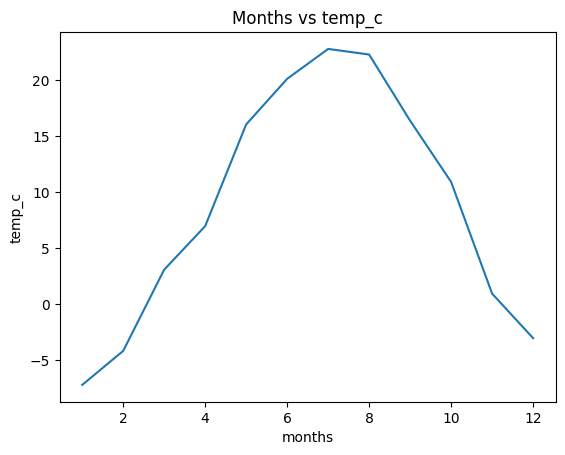

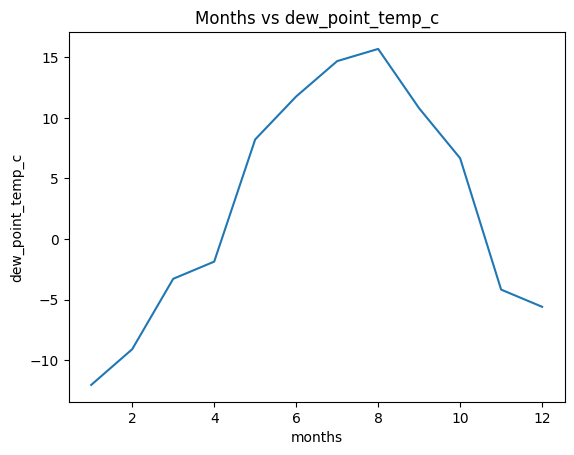

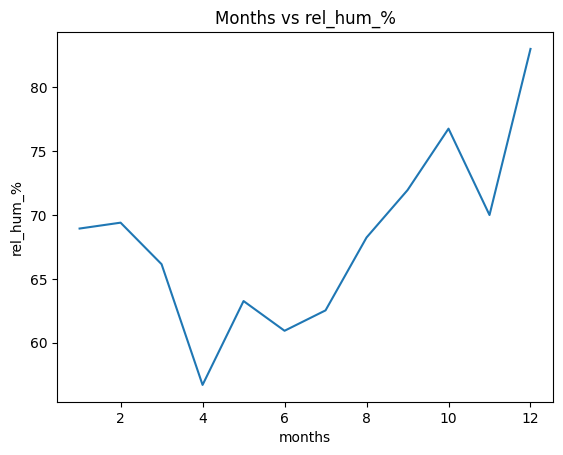

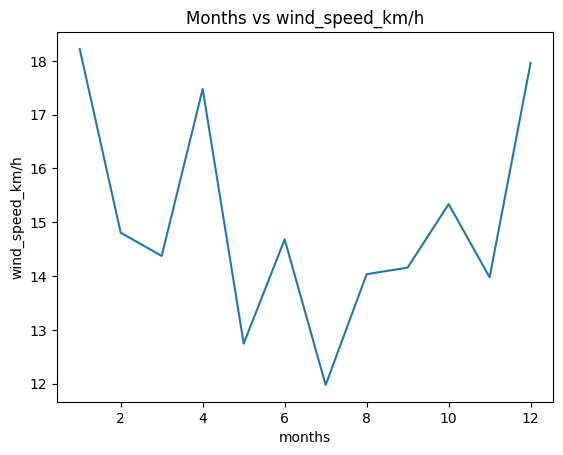

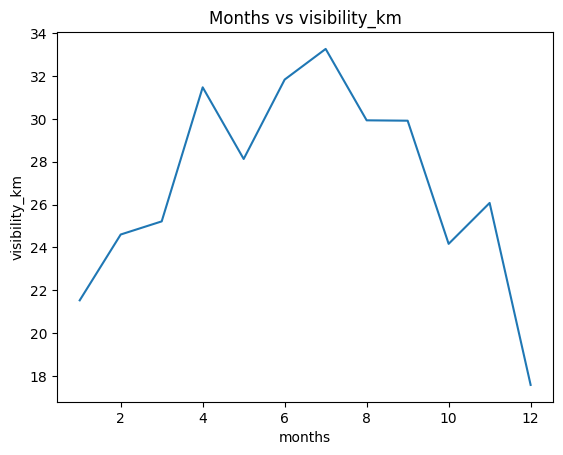

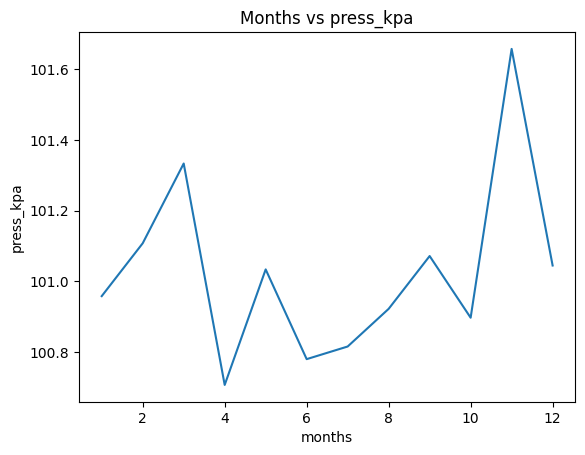

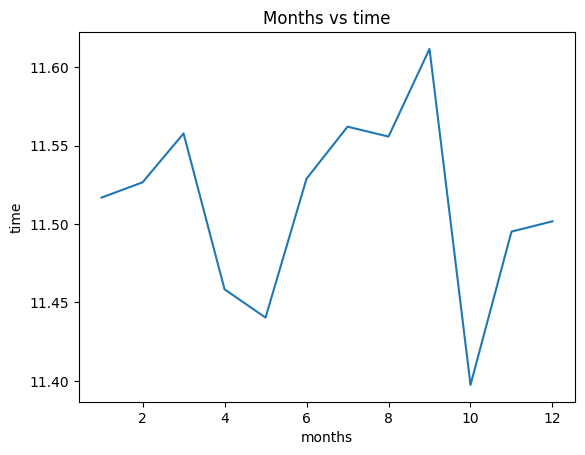

In [41]:
columns=df.columns.tolist()[:-3]
print ("Relation month with each varibels ")
for column in columns:
    # nilai x dan y
    y = df.groupby('months')[column].mean().astype(float).tolist()
    x =df['months'].unique().tolist()
    # grafik
    plt.plot (x,y)
    plt.title(f'Months vs {column}')
    plt.xlabel("months")
    plt.ylabel(column)
    plt.show()
    

In [42]:
len(df['weathers'].unique())


6

weather at each months
1


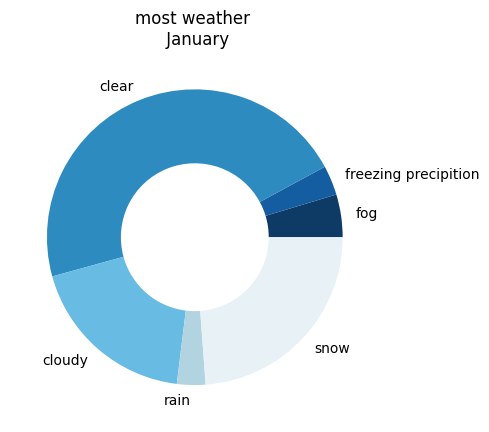

2


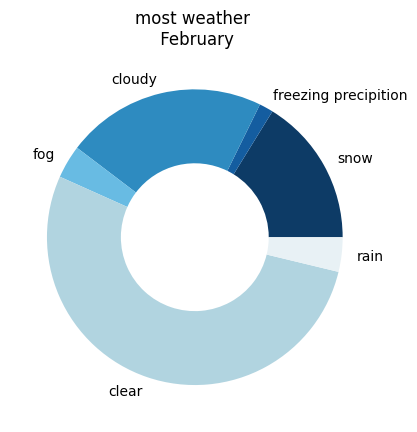

3


4


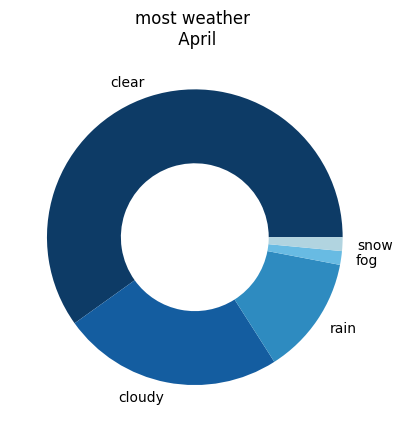

5


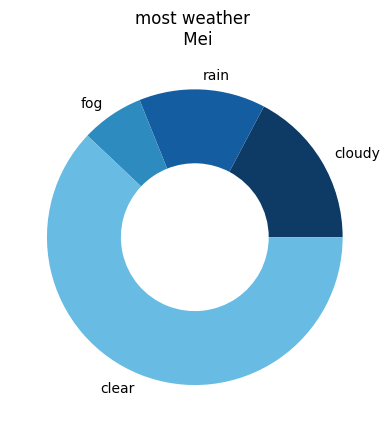

6


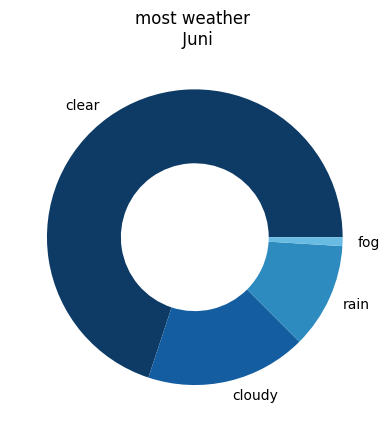

7


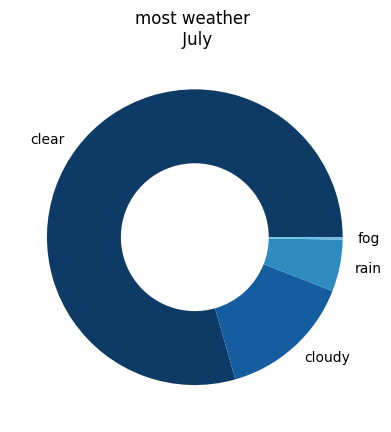

8


9


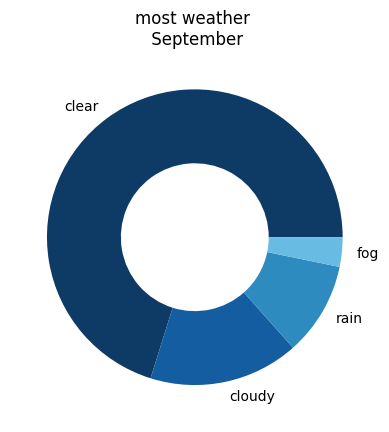

10


11


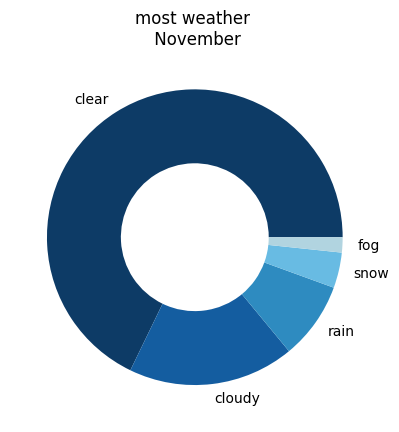

12


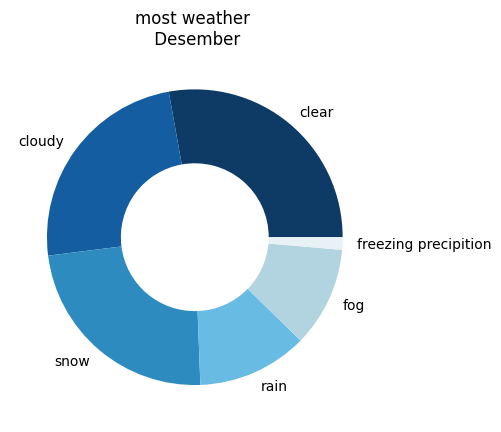

In [43]:
# Visualisation persentage of weathers at each month 
color =  ['#0D3B66', '#145DA0', '#2E8BC0', '#68BBE3', '#B1D4E0', '#E8F1F5']
print ("weather at each months")
time =df['months'].unique()
for i in time :
    print (i)
    month =df['months']==i
    if i==1 :
        j="January"
    elif i==2:
        j="February"
    elif i==3: 
        j="Maret"
    elif i==4: 
        j="April"
    elif i==5: 
        j="Mei"
    elif i==6: 
        j="Juni"
    elif i==7: 
        j="July"
    elif i==8: 
        j="August"
    elif i==9: 
        j="September"
    elif i==10: 
        j="Oktober"
    elif i==11: 
        j="November"
    elif i==12: 
        j="Desember"
    count =Counter(df.loc[month,'weathers'])
    plt.pie (count.values(),labels=count.keys(),colors=color, wedgeprops={'width': 0.5} )
    plt.title(f"most weather \n {j}")
    
    plt.show()
    
    

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9156 entries, 0 to 9155
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   temp_c            9156 non-null   float64
 1   dew_point_temp_c  9156 non-null   float64
 2   rel_hum_%         9156 non-null   int64  
 3   wind_speed_km/h   9156 non-null   int64  
 4   visibility_km     9156 non-null   float64
 5   press_kpa         9156 non-null   float64
 6   time              9156 non-null   int64  
 7   months            9156 non-null   int64  
 8   year              9156 non-null   int64  
 9   weathers          9156 non-null   object 
dtypes: float64(4), int64(5), object(1)
memory usage: 786.8+ KB


In [45]:
df.columns.tolist()

['temp_c',
 'dew_point_temp_c',
 'rel_hum_%',
 'wind_speed_km/h',
 'visibility_km',
 'press_kpa',
 'time',
 'months',
 'year',
 'weathers']

In [46]:
# =====================================================
# Visualisation Mancari hubungan antar varibel
# =====================================================
df.columns

Index(['temp_c', 'dew_point_temp_c', 'rel_hum_%', 'wind_speed_km/h',
       'visibility_km', 'press_kpa', 'time', 'months', 'year', 'weathers'],
      dtype='object')

In [47]:
# choise columns for model
columns=df.columns[:-2]
print (f"columns :{columns}")
print (f"total columns :{len(columns)}")

columns :Index(['temp_c', 'dew_point_temp_c', 'rel_hum_%', 'wind_speed_km/h',
       'visibility_km', 'press_kpa', 'time', 'months'],
      dtype='object')
total columns :8


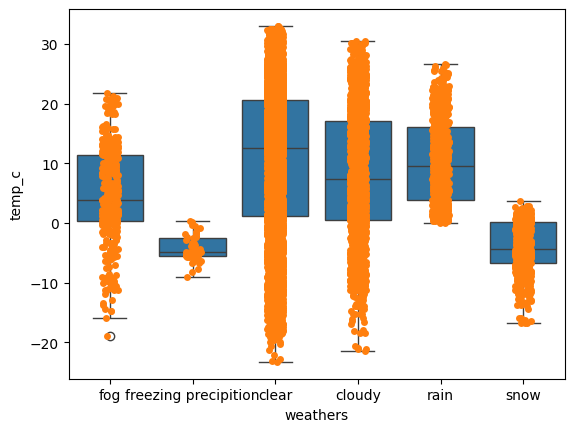

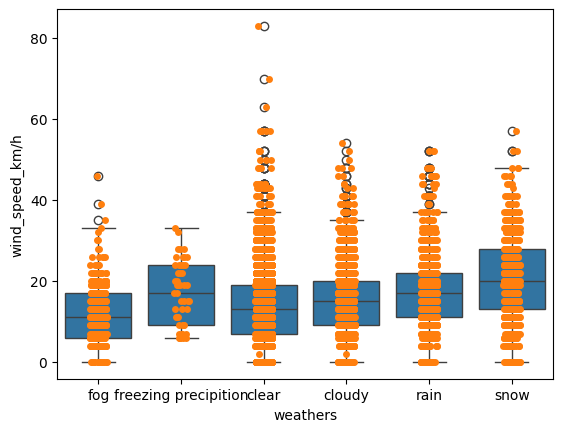

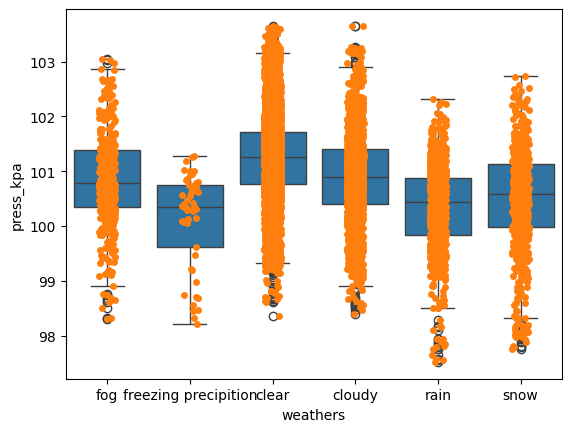

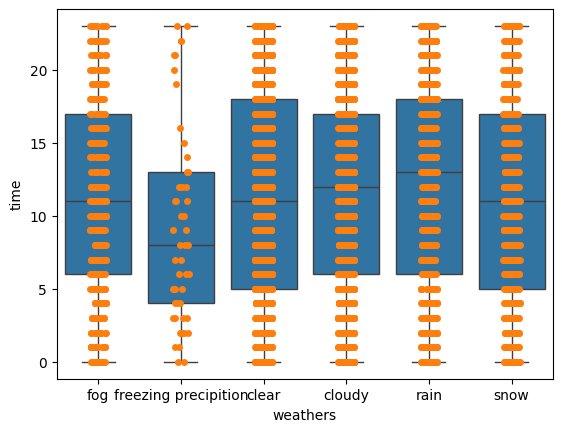

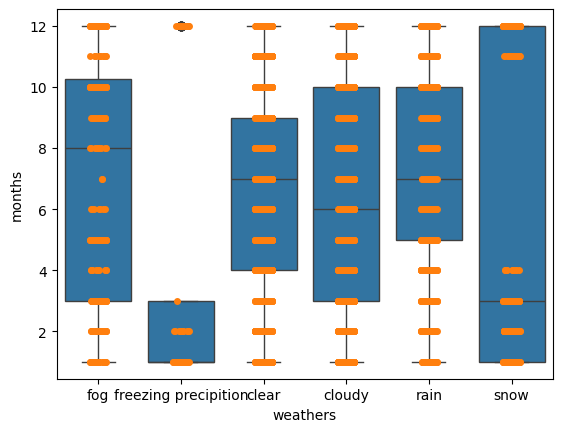

In [48]:
# ===========================
# Featuring data
# ==========================
# coraltaion each var with target 

for i in range(len(columns)):
    sns.boxplot(df,x='weathers',y=df[columns[i]])
    sns.stripplot(data=df,x='weathers',y=df[columns[i]]) 
    plt.show()

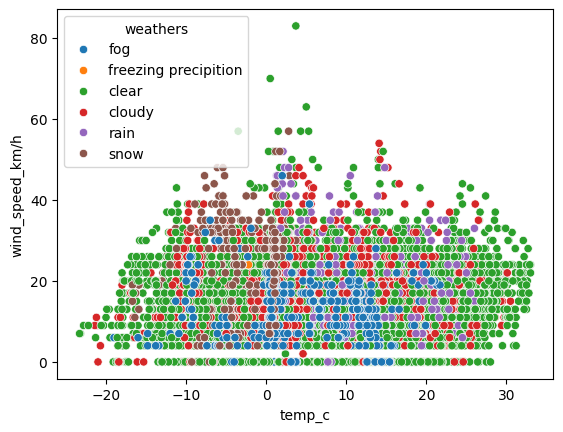

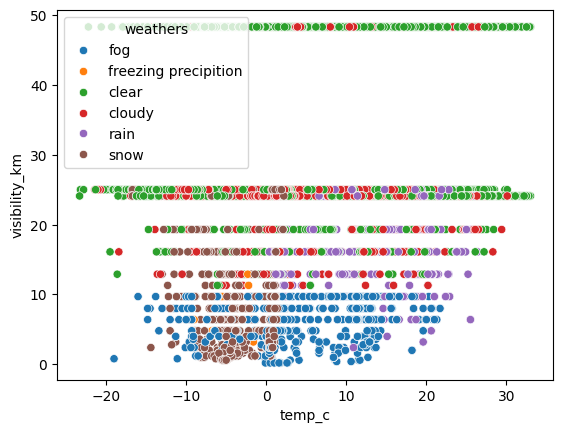

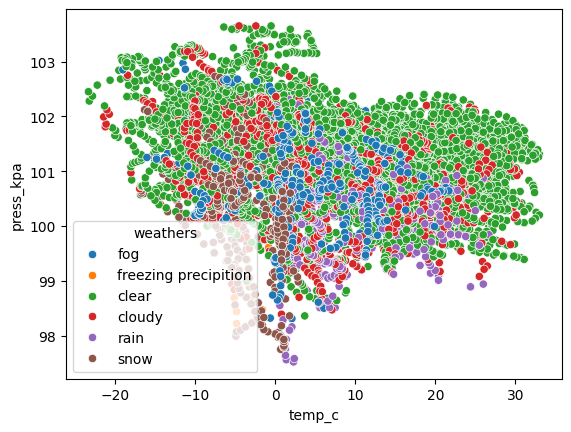

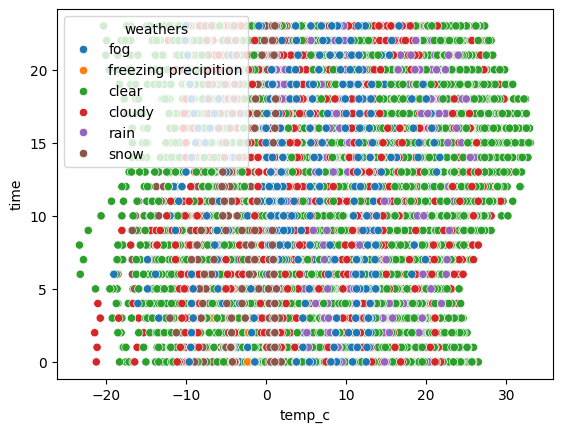

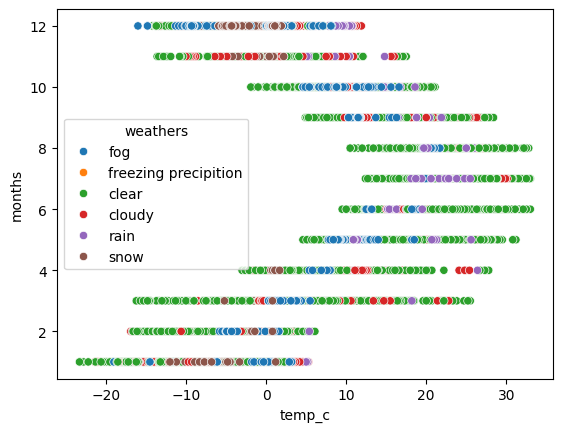

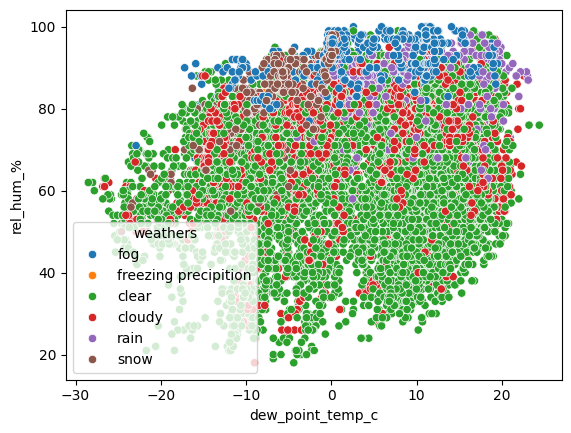

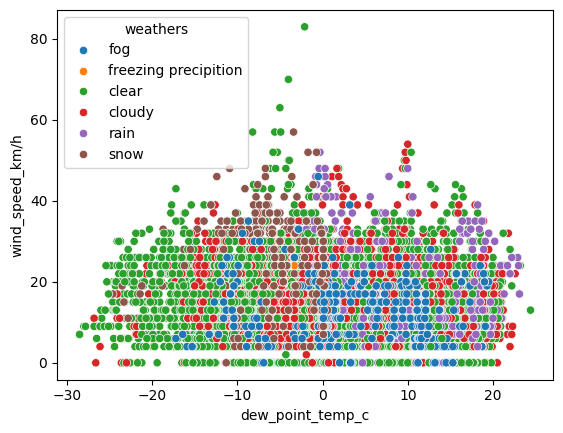

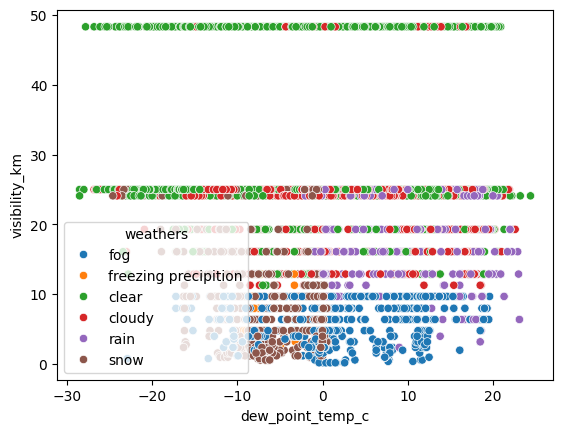

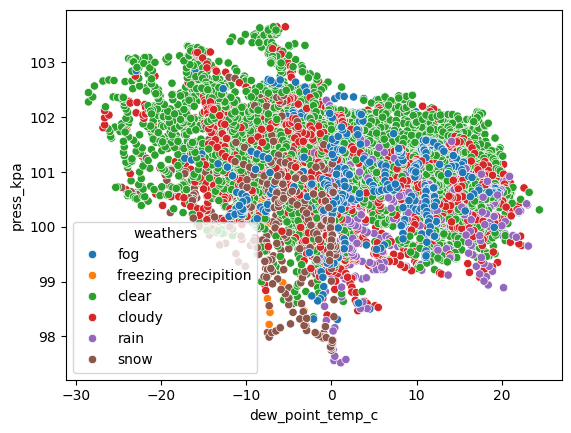

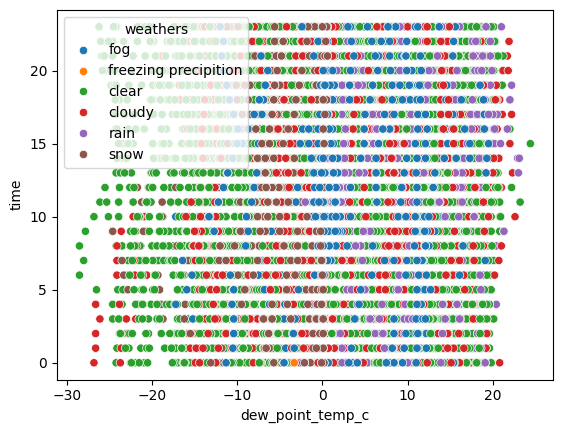

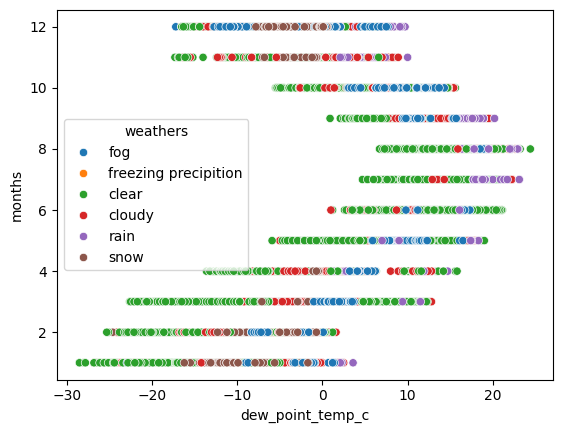

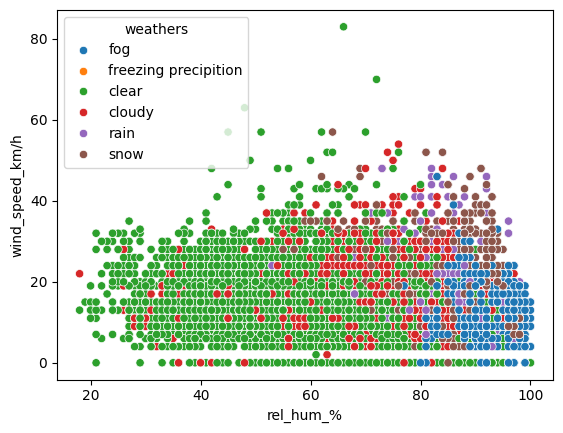

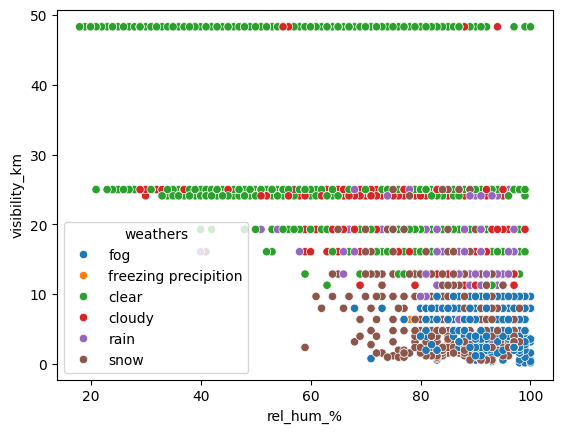

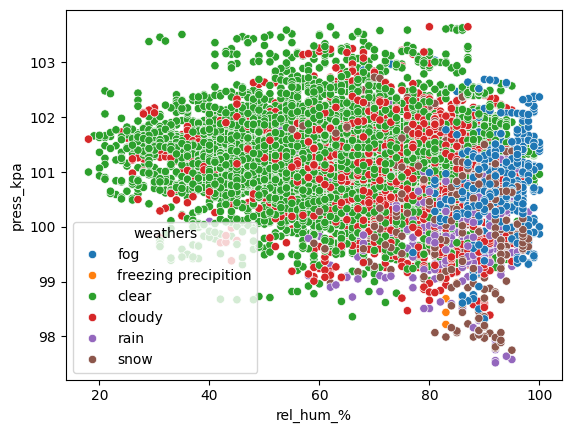

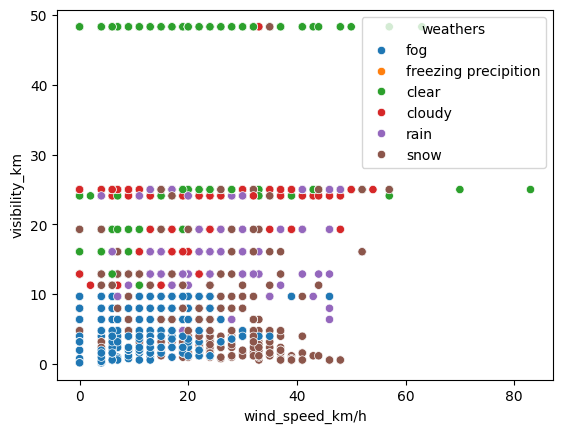

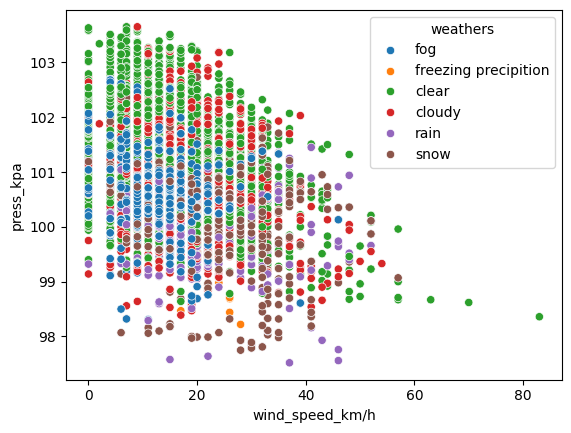

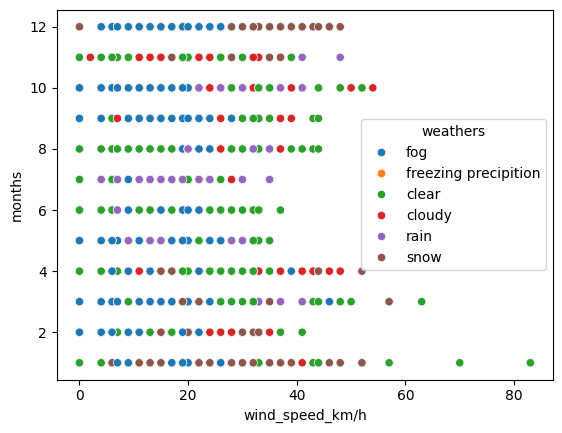

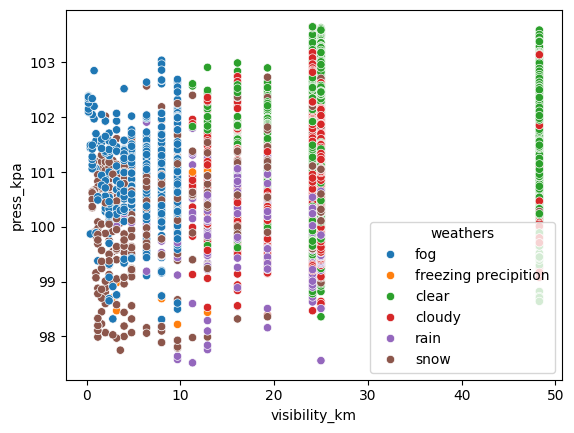

In [49]:

# visualisation relation data antar variable

for i in range (len(columns)):
   
    for j in range(i+1,len(columns)):
        sns.scatterplot(df,x=df[columns[i]],y= df[columns[j]],hue ='weathers')
        plt.show()

In [50]:
df.head (5)

temp_c  dew_point_temp_c  rel_hum_%  wind_speed_km/h  visibility_km  \
0    -1.8              -3.9         86                4            8.0   
1    -1.8              -3.7         87                4            8.0   
2    -1.8              -3.4         89                7            4.0   
3    -1.5              -3.2         88                6            4.0   
4    -1.5              -3.3         88                7            4.8   

   press_kpa  time  months  year              weathers  
0     101.24     0       1  2012                   fog  
1     101.24     1       1  2012                   fog  
2     101.26     2       1  2012  freezing precipition  
3     101.27     3       1  2012  freezing precipition  
4     101.23     4       1  2012                   fog

In [151]:
# rescaling data
keys=df.columns[:-4]
print (keys)

Index(['temp_c', 'dew_point_temp_c', 'rel_hum_%', 'wind_speed_km/h',
       'visibility_km', 'press_kpa'],
      dtype='object')


In [ ]:
for i in keys:
    min_=df[i].min()
    max_=df[i].max()
    val=[]
    for j in df[i]:
        new_val=(j-min_)/(max_-min_)
        val.append(new_val)
    print (val)
    df[i]=val
    

In [153]:
# ======================================
# buid model 
# ======================================
# set feature
x =df[df.columns[:-1]]
y= df[df.columns[-1]]

def varible(x,y):
    points =x.values.tolist()
    keys =y.values.tolist()
    return points,keys

points,keys=varible(x,y )


In [154]:
# =================================
# split data test and train
# =================================

def shuffle_index(data:list[int],prob:float):
    data=data[:]
    random.shuffle(data)
    cut=int (len(data)*prob)
    return data[:cut],data[cut:]
    
def split_train_test(xs:list[Vector],ys:list[float],test_pct:float):
    # index 
    idx=[i for i in range(len(xs))]
    train_pct=1 -test_pct
    idx_train,idx_test=shuffle_index(idx,train_pct)
    return (
        # train
        [xs[i] for i in idx_train],
        [ys [i] for i in  idx_train],
        # test 
        [xs[i] for i in idx_test],
        [ys [i] for i in idx_test]
    )

In [155]:
# K-Nearst model with scracth 

# vote fungstion
def vote(labels:list[str]):
    count =Counter(labels)
    winner, winner_val =count.most_common(1)[0]
    # if winner is not 1
    num_winner =len([i for i in count.values() if i == winner_val])
    if num_winner==1:
        return winner 
    else :
        return vote(labels[:-1])
    

In [156]:
class labelPoints(NamedTuple):
    point:Vector
    label:str
    
def k_near(k:int,labelpoint:list[labelPoints],new_point:Vector):
    by_distance=sorted(labelpoint,key=lambda lp: distance(lp.point,new_point))
    label_k=[lp.label for lp in by_distance[:k]]
    return vote(label_k)



In [ ]:
points_train,keys_train,points_test,keys_test =split_train_test (points,keys,0.25)

In [161]:
lp_train = [
    labelPoints(p, l)
    for p, l in zip(points_train, keys_train)
]
lp_test =[
    labelPoints(p,l) for p,l in zip(points_test,keys_test)
]


In [163]:
# full varible 
num_corect=0
for test in lp_test:
    predict = k_near(20,lp_train,test.point)
    actual =test.label
    if predict==actual:
        num_corect +=1
    
persentage=num_corect/len(lp_test)
print(f"accuracy :{persentage}")

accuracy :0.6221057230231543


In [141]:
# without time and date feathur
x =df[df.columns[:-2]]
y= df[df.columns[-1]]

def varible(x,y):
    points =x.values.tolist()
    keys =y.values.tolist()
    return points,keys

points,keys=varible(x,y )


In [142]:
points_train,keys_train,points_test,keys_test =split_train_test (points,keys,0.1)
lp_train = [
    labelPoints(p, l)
    for p, l in zip(points_train, keys_train)
]
lp_test =[
    labelPoints(p,l) for p,l in zip(points_test,keys_test)
]


In [164]:
num_corect=0
for test in lp_test:
    predict = k_near(5,lp_train,test.point)
    actual =test.label
    if predict==actual:
        num_corect +=1
    
persentage=num_corect/len(lp_test)
print(f"accuracy: {persentage}")

accuracy: 0.63564875491481


In [167]:
# make output balance 
count=Counter(df['weathers'])

In [169]:
number =49
df=df.sort_values(by='weathers',ignore_index=True )
index =[]
for col in df['weathers'].unique():
    idx=np.where(df['weathers']==col)
    idx =[i.tolist() for i in idx]
    idx =idx[0]
    for i in range(number):
        index.append(idx[i])
    



In [170]:
x =df.loc[index,df.columns[:-1]]
y= df.loc[index,df.columns[-1]]

def varible(x,y):
    points =x.values.tolist()
    keys =y.values.tolist()
    return points,keys

points,keys=varible(x,y )
len(x)

294

In [171]:
points_train,keys_train,points_test,keys_test =split_train_test (points,keys,0.1)
points_train,keys_train,points_test,keys_test =split_train_test (points,keys,0.1)
lp_train = [
    labelPoints(p, l)
    for p, l in zip(points_train, keys_train)
]
lp_test =[
    labelPoints(p,l) for p,l in zip(points_test,keys_test)
]


In [172]:
num_corect=0
for test in lp_test:
    predict = k_near(5,lp_train,test.point)
    actual =test.label
    if predict==actual:
        num_corect +=1
    
persentage=num_corect/len(lp_test)
print(f"accuracy{persentage}")

accuracy0.5666666666666667


In [173]:
count

Counter({'clear': 5501,
         'cloudy': 1728,
         'rain': 833,
         'snow': 613,
         'fog': 432,
         'freezing precipition': 49})

In [188]:
number =432
df=df.sort_values(by='weathers',ignore_index=True )
weather=['clear','cloudy','fog','rain','snow']
index =[]
for col in weather:
    idx=np.where(df['weathers']==col)
    idx =[i.tolist() for i in idx]
    idx =idx[0]
    for i in range(number):
        index.append(idx[i])
    

In [189]:
x =df.loc[index,df.columns[:-1]]
y= df.loc[index,df.columns[-1]]

def varible(x,y):
    points =x.values.tolist()
    keys =y.values.tolist()
    return points,keys

points,keys=varible(x,y )
len(x)

2160

In [190]:
points_train,keys_train,points_test,keys_test =split_train_test (points,keys,0.1)

lp_train = [
    labelPoints(p, l)
    for p, l in zip(points_train, keys_train)
]
lp_test =[
    labelPoints(p,l) for p,l in zip(points_test,keys_test)
]


In [191]:
num_corect=0
for test in lp_test:
    predict = k_near(5,lp_train,test.point)
    actual =test.label
    if predict==actual:
        num_corect +=1
    
persentage=num_corect/len(lp_test)
print(f"accuracy:{persentage}")

accuracy:0.5879629629629629
